In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#EDA of the dataset

In [ ]:
data = pd.read_csv('titanic.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.isna().sum().sum()

414

In [ ]:
#creating a heatmap of null values

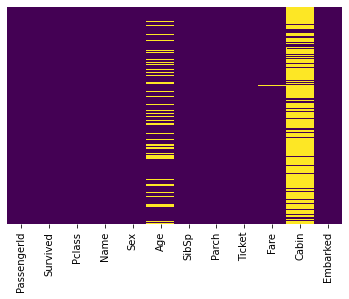

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#plot of number of survivors

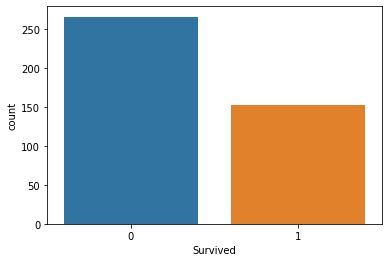

In [ ]:
sns.countplot(x='Survived',data=data)

In [ ]:
#plot of gender 

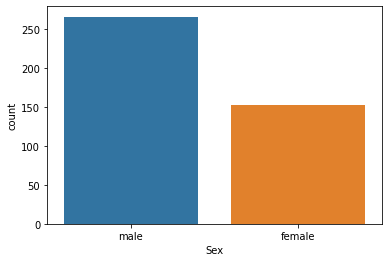

In [ ]:
sns.countplot(x='Sex',data=data)

In [ ]:
#plot of gender within survived

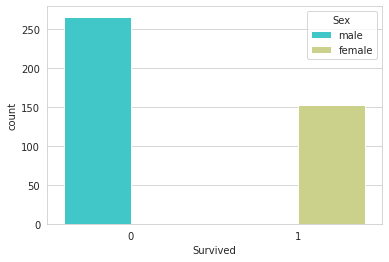

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='rainbow')

In [ ]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 1.0


In [ ]:
men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.0


In [ ]:
#plot of Passenger class within passengers who survived or didn't

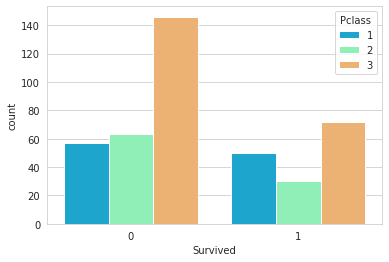

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

In [ ]:
#distribution plot of age of passengers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


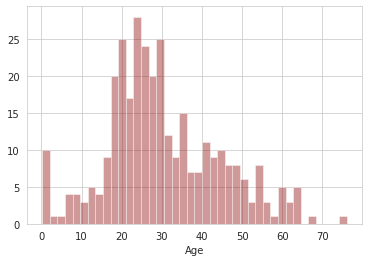

In [ ]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

In [ ]:
#countplot of siblings+spouse of passengers

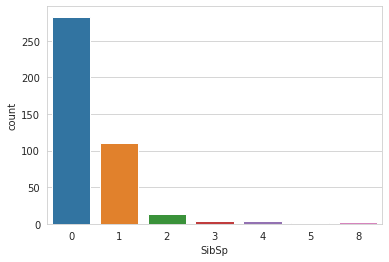

In [ ]:
sns.countplot(x='SibSp',data=train)

In [ ]:
#plot on fare

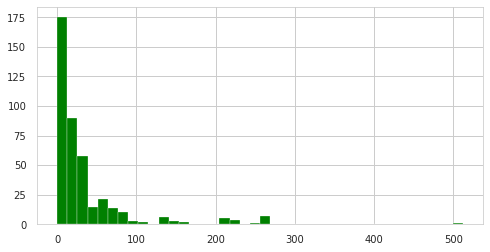

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
#plot of Embarking Location within passengers who survived or didn't

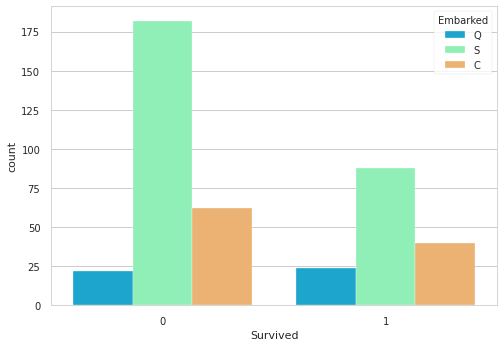

In [ ]:
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

In [ ]:
#We'll use these average age values to impute based on Pclass for Age.

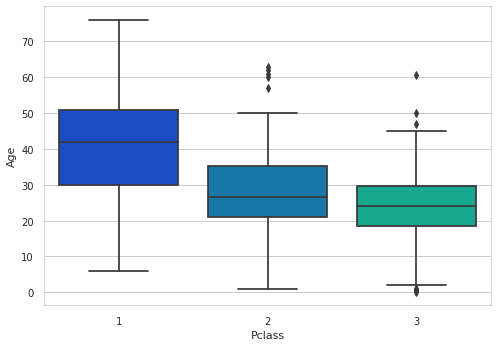

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 28

        else:
            return 25

    else:
        return Age

In [ ]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

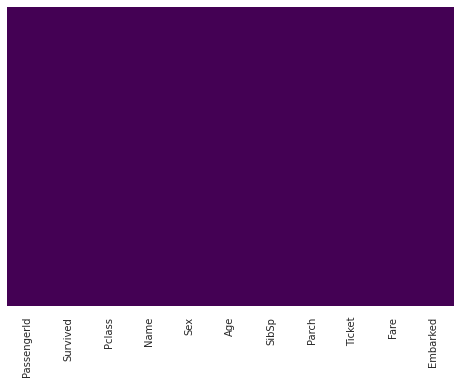

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#dropping cabin column

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
#dropping na row in Fare

In [ ]:
data.dropna(inplace=True)

In [ ]:
#dealing with categorical data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [ ]:
#converting into indicator variables

In [ ]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
pd.get_dummies(data['Sex'],drop_first=True).head()

,male
0,1
1,0
2,1
3,1
4,0


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [ ]:
data = pd.concat([data,sex,embark],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [ ]:
#building a logistic regression model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#training and prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=300)
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=300)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[65,  0],
       [ 0, 61]])

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

